In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [ ]:
dataLabels = ['tree','house','zero','bed','yes','four','up','stop','no','wow','nine','happy','follow', 'visual','cat','two', 'forward', 'down','right', 'marvin', 'seven', 'go', 'three',  'backward', 'on', 'dog', 'one', 'sheila', 'eight', 'bird', 'six', 'learn', 'off', 'left', 'five']
file_path='/content/drive/MyDrive/Colab Notebooks/data/'

In [ ]:
def get_train_test(filepath,labels):
    # Getting first arrays
    X = np.load(file_path+labels[0]+'.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(file_path+label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= 0.2, random_state=42, shuffle=True)

In [ ]:
X_train, X_test, y_train, y_test = get_train_test(file_path,dataLabels)

In [ ]:
# # Feature dimension

epochs = 50
batch_size = 100

num_classes = 35
channels = 1
max_len = 44
buckets = 20

X_train = X_train.reshape(X_train.shape[0], buckets, max_len, channels)
X_test = X_test.reshape(X_test.shape[0],  buckets, max_len, channels)

32.0


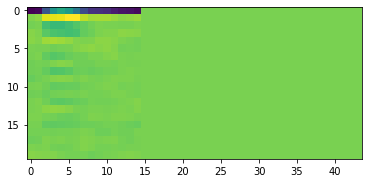

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

In [ ]:
y_train_hot = tf.keras.utils.to_categorical(y_train,dtype='float32')
y_test_hot = tf.keras.utils.to_categorical(y_test,dtype='float32')

In [ ]:
X_train = X_train.reshape(X_train.shape[0], buckets, max_len)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len)

In [ ]:
X_train.shape, X_test.shape

((84663, 20, 44), (21166, 20, 44))

In [ ]:
# # lr = 0.01
# loss: 27.4943 - accuracy: 0.4399 - val_loss: 27.2929 - val_accuracy: 0.4311
# loss: 26.3002 - accuracy: 0.4495 - val_loss: 26.3374 - val_accuracy: 0.4521
# loss: 1.8144 - accuracy: 0.3435 - val_loss: 1.6906 - val_accuracy: 0.4290
# loss: 1.7225 - accuracy: 0.3773 - val_loss: 1.6321 - val_accuracy: 0.4430
# loss: 1.5523 - accuracy: 0.4461 - val_loss: 1.4504 - val_accuracy: 0.5420
# loss: 1.0734 - accuracy: 0.6404 - val_loss: 1.1595 - val_accuracy: 0.6581
# loss: 0.8476 - accuracy: 0.7358 - val_loss: 0.9975 - val_accuracy: 0.7095

# epochs 100

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(buckets, max_len)),
        layers.Dense(256, activation="relu", name="layer1"),
        layers.Dropout(0.6),
        layers.Dense(512, activation="relu", name="layer2"),
        # layers.Dropout(0.6),
        layers.Dense(1024, activation="relu", name="layer3"),
        layers.Dense(512, activation="relu", name="layer4"),
        layers.Dense(256, activation="relu", name="layer5"),
        # layers.Dropout(0.4),
        layers.Dense(128, activation="relu", name="layer6"),
        layers.Dense(num_classes, activation="softmax", name="layer7"),
    ]
)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 880)               0         
_________________________________________________________________
layer1 (Dense)               (None, 256)               225536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
layer2 (Dense)               (None, 512)               131584    
_________________________________________________________________
layer3 (Dense)               (None, 1024)              525312    
_________________________________________________________________
layer4 (Dense)               (None, 512)               524800    
_________________________________________________________________
layer5 (Dense)               (None, 256)              

In [ ]:
model.fit(X_train, y_train_hot, epochs=100, validation_data=(X_test, y_test_hot))

Epoch 1/100
2646/2646 [==============================] - 10s 3ms/step - loss: 3.6788 - accuracy: 0.1348 - val_loss: 2.1496 - val_accuracy: 0.4002
Epoch 2/100
2646/2646 [==============================] - 8s 3ms/step - loss: 2.3056 - accuracy: 0.3175 - val_loss: 1.8965 - val_accuracy: 0.4860
Epoch 3/100
2646/2646 [==============================] - 8s 3ms/step - loss: 2.0877 - accuracy: 0.3831 - val_loss: 1.7077 - val_accuracy: 0.5162
Epoch 4/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.9571 - accuracy: 0.4154 - val_loss: 1.6806 - val_accuracy: 0.5348
Epoch 5/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.8749 - accuracy: 0.4425 - val_loss: 1.5684 - val_accuracy: 0.5775
Epoch 6/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.8160 - accuracy: 0.4626 - val_loss: 1.5436 - val_accuracy: 0.5705
Epoch 7/100
2646/2646 [==============================] - 8s 3ms/step - loss: 1.7610 - accuracy: 0.4761 - val_loss: 1.4852 - val_a

In [ ]:
model.save("my_h5_model.h5")

In [ ]:
! cp my_h5_model.h5 '/content/drive/MyDrive/Colab Notebooks/data/'